In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
from matplotlib import rcParams
import matplotlib.font_manager
rcParams['font.sans-serif']=['Arial']
sc.settings.set_figure_params(dpi=100, facecolor='white',fontsize=12)

import seaborn as sns
import matplotlib.pyplot as plt

scanpy==1.7.2 anndata==0.7.6 umap==0.4.6 numpy==1.22.4 scipy==1.6.2 pandas==1.5.2 scikit-learn==0.22 statsmodels==0.12.2 python-igraph==0.9.4


In [ ]:
adata=sc.read('ATAC_401875cells_peaks.h5ad')

#we remove cells that are not identified in both modalities
adata2 = adata[adata.obs['celltype5'] != 'NA', :]

cell_use=[]
for i in adata2.obs.index:
    if 'P1.02,B3' in i:
        cell_use.append('no')
    else:
        cell_use.append('yes')
adata2.obs['cell_use']=cell_use
adata2 = adata2[adata2.obs['cell_use'] != 'no', :]

In [20]:
celltype_atac=[]
celltype_atac_dict={'PT_VCAM1':'PT',
    'TAL1':'TAL','TAL2/3':'TAL','PC1':'PC','PC2':'PC',
    'tL1':'tL','tL2':'tL','tL-TAL':'tL',
    'Fib1':'Fib/JGA','Fib2':'Fib/JGA','Fib3':'Fib/JGA'
}
for i in adata2.obs['celltype_2023']:
    if i in celltype_atac_dict.keys():
        celltype_atac.append(celltype_atac_dict[i])
    else:
        celltype_atac.append(i)
adata2.obs['celltype_atac']=celltype_atac

In [21]:
cell_order=['POD/PEC',
'PT',
'tL','TAL',
'DCT','CNT','PC','IC',
'Uro',
'ENDO','SMC',
'Fib/JGA',
'Ma','BT']

count_matrix=pd.DataFrame(0, index=cell_order, columns=cell_order)
for i,j in zip(adata2.obs['celltype_rna'],adata2.obs['celltype_atac']):
    count_matrix[i].loc[j]+=1
count_matrix

,POD/PEC,PT,tL,TAL,DCT,CNT,PC,IC,Uro,ENDO,SMC,Fib/JGA,Ma,BT
POD/PEC,1091,255,216,23,5,9,5,8,17,31,39,61,3,3
PT,1419,91165,3900,1947,663,833,741,764,594,741,577,1391,495,632
tL,328,2315,39955,7433,1190,626,676,198,589,535,164,336,70,102
TAL,157,1721,3879,45190,933,370,419,202,139,490,118,236,70,122
DCT,136,700,677,2291,10326,2460,428,119,85,120,94,155,51,62
CNT,61,415,206,202,468,5234,2895,98,76,104,33,84,30,44
PC,101,546,211,142,119,3185,14015,153,162,415,41,87,16,33
IC,142,546,133,131,72,77,85,12575,59,173,25,68,16,31
Uro,21,246,98,118,19,24,374,41,1962,91,47,36,5,7
ENDO,618,2202,203,289,138,162,150,304,61,9577,54,234,25,32


In [22]:
cell_number_count=pd.DataFrame(adata2.obs['celltype_atac'].value_counts())
count_matrix2=count_matrix.copy()
for i in cell_order:
    count_matrix2.loc[i]=count_matrix2.loc[i]/float(cell_number_count.loc[i])

# proportion of cells identified as celltypeA in ATAC are identified as celltypeB in RNA

In [23]:
count_matrix3=count_matrix.copy()
for i in cell_order:
    count_matrix3[i]=count_matrix3[i]/float(cell_number_count.loc[i])

# proportion of cells identified as celltypeA in RNA are identified as celltypeB in ATAC

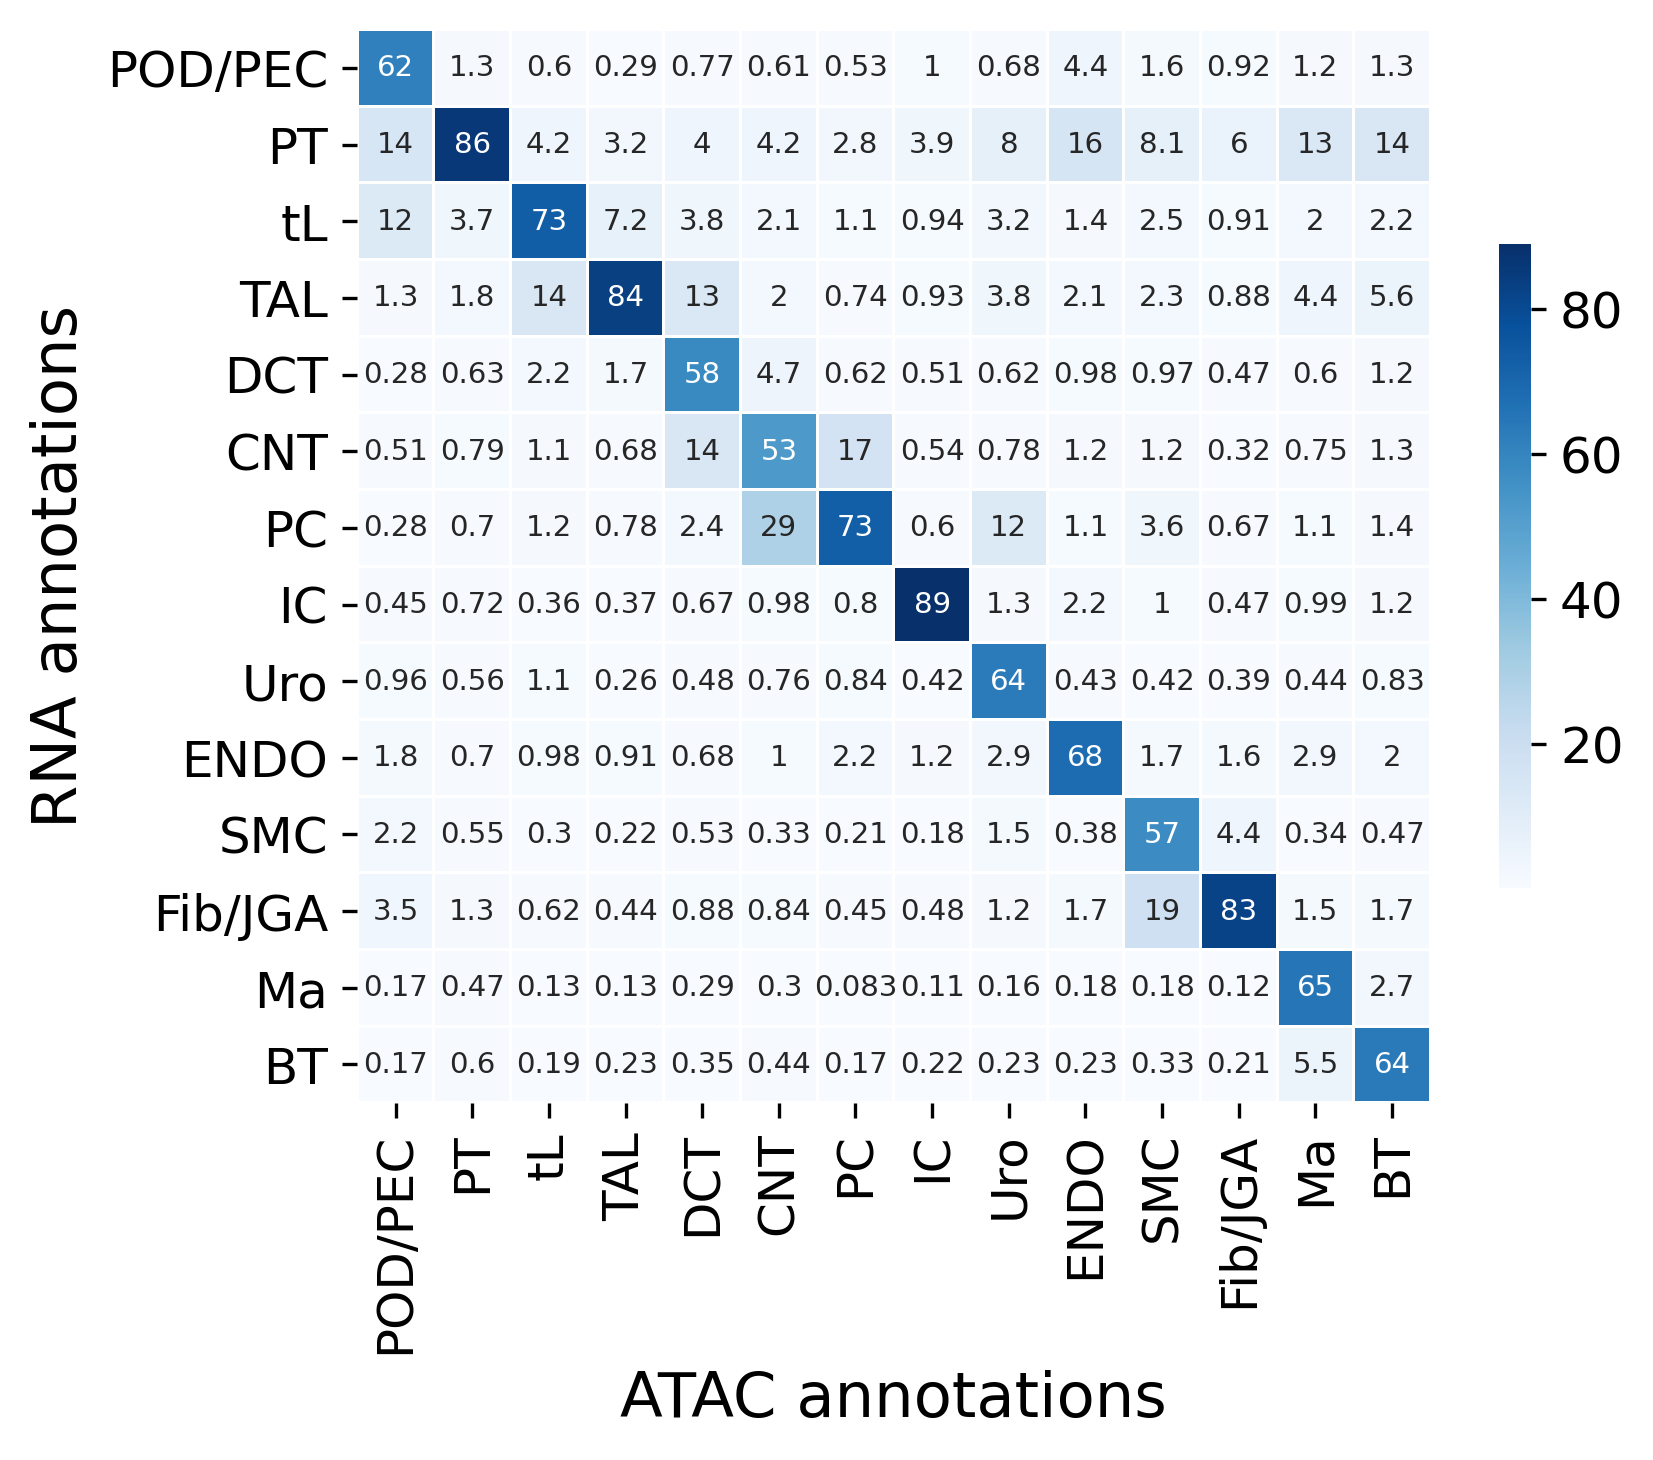

In [24]:
plt.figure(dpi=300,figsize=(6,5))
#f, ax = plt.subplots(figsize=(6,5))
sns.heatmap(count_matrix2.T*100,cmap='Blues',square=True, annot=True, annot_kws={"size": 7},linewidths=0.5, cbar_kws={"shrink": 0.6})
plt.ylabel('RNA annotations',fontsize=15)
plt.xlabel('ATAC annotations',fontsize=15)
plt.tight_layout()
plt.show()

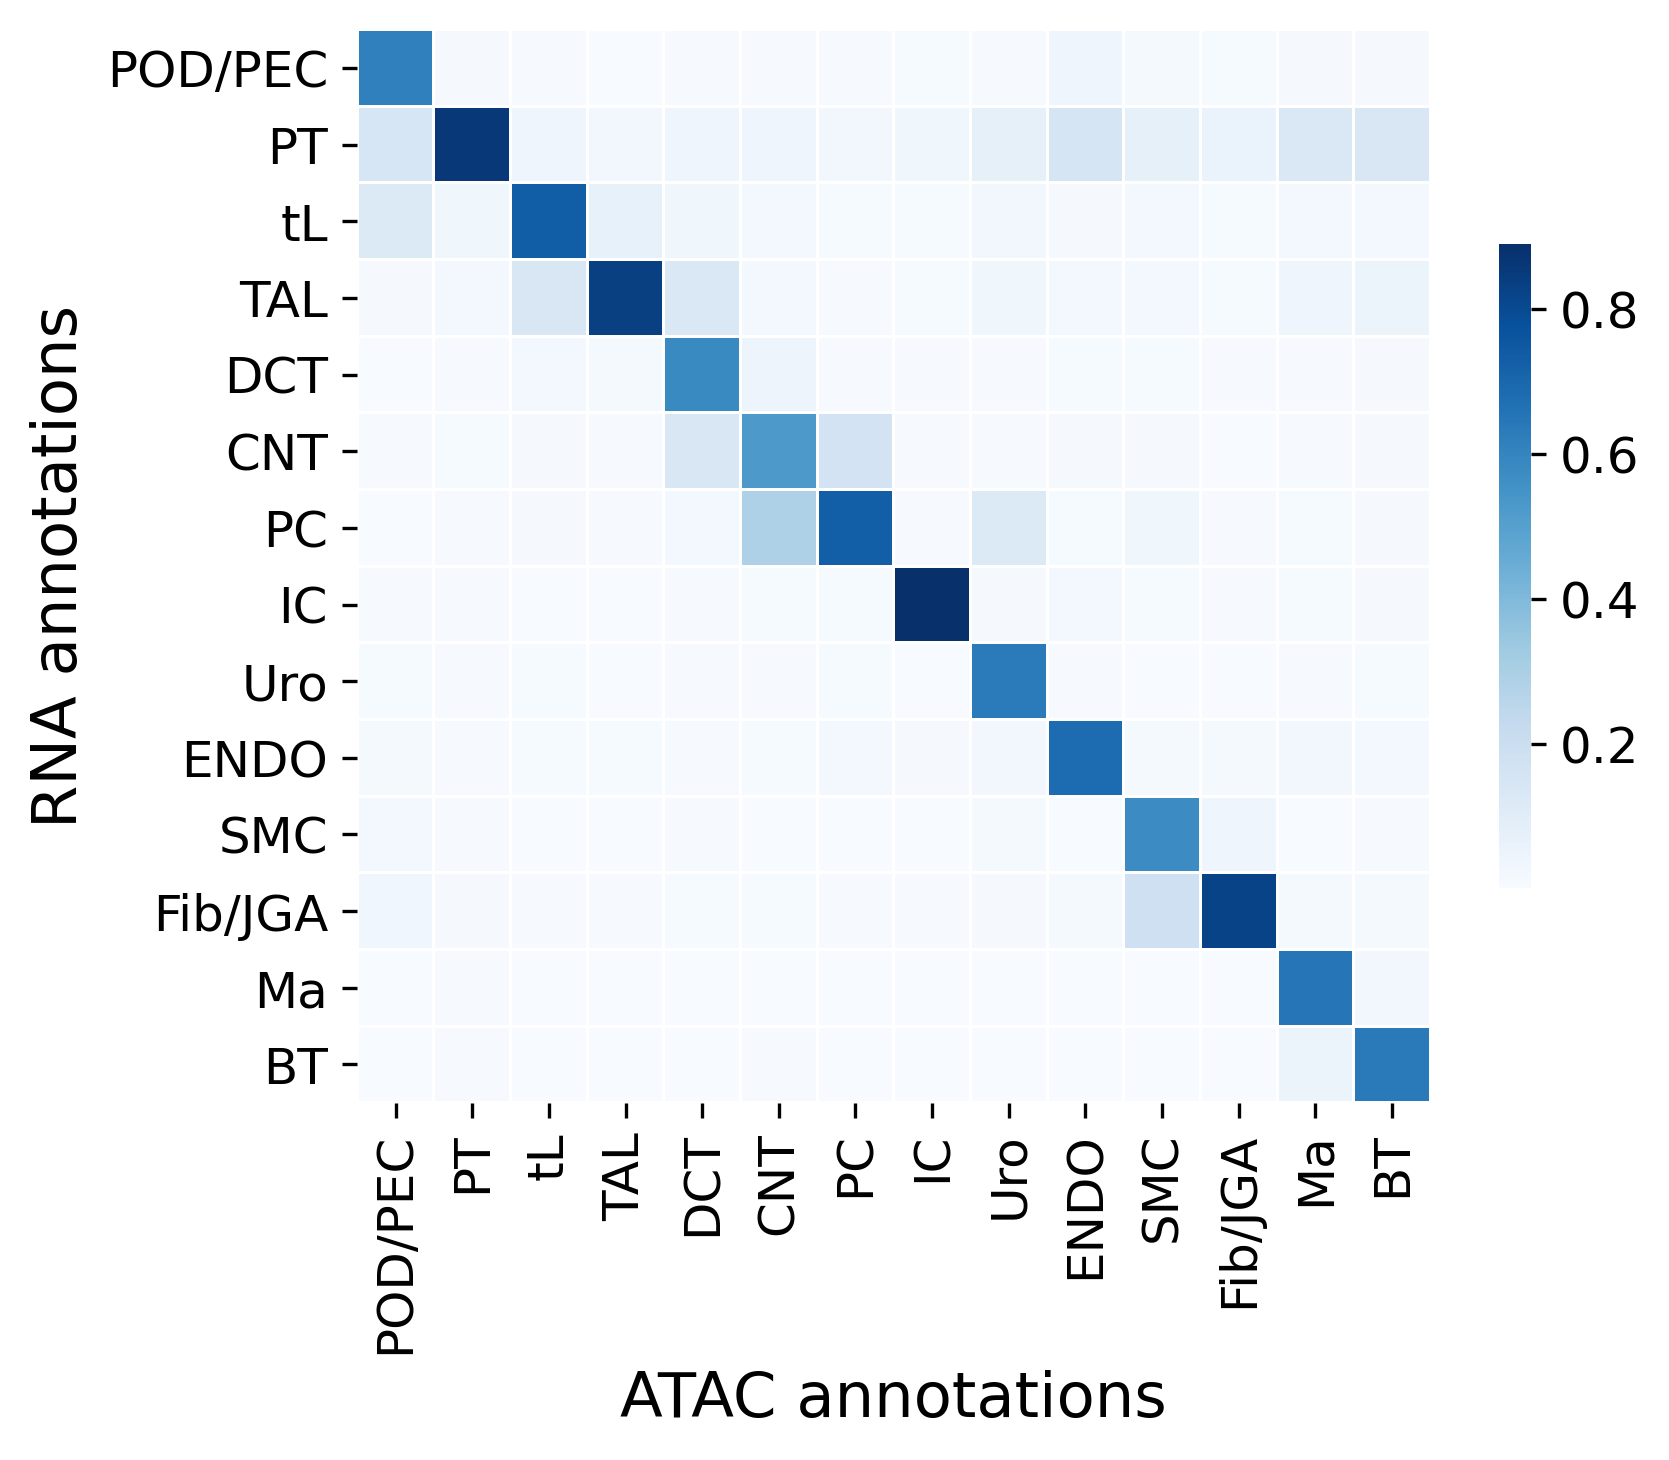

In [25]:
plt.figure(dpi=300,figsize=(6,5))
#f, ax = plt.subplots(figsize=(6,5))
sns.heatmap(count_matrix2.T,cmap='Blues',square=True, linewidths=0.5, cbar_kws={"shrink": 0.6}
           )
plt.ylabel('RNA annotations',fontsize=15)
plt.xlabel('ATAC annotations',fontsize=15)
plt.tight_layout()
plt.show()

In [29]:
cell_order=['JGA', 'POD', 'PEC', 'PT', 'PT_dediff', 'PT_VCAM1', 'tL1','tL2','tL-TAL',
                                                   'TAL1','TAL2', 'TAL3', 'DCT', 'CNT', 'PC1', 'PC2', 'ICA', 'ICB', 
       'Uro1', 'Uro2', 'ENDO', 'SMC1', 'SMC2', 'SMC3',
       'Fib1', 'Fib2', 'Fib3', 'Ma', 'BT']

cell_order2=['POD/PEC', 'PT', 'PT_VCAM1', 'tL1','tL2','tL-TAL', 'TAL1', 'TAL2/3', 
                                                   'DCT', 'CNT',
       'PC1', 'PC2', 'IC', 'Uro', 'ENDO', 'SMC',
       'Fib1', 'Fib2', 'Fib3', 'Ma', 'BT']

count_matrix=pd.DataFrame(0, index=cell_order2, columns=cell_order)
for i,j in zip(adata2.obs['celltype5_rna'],adata2.obs['celltype_2023']):
    count_matrix[i].loc[j]+=1
count_matrix

,JGA,POD,PEC,PT,PT_dediff,PT_VCAM1,tL1,tL2,tL-TAL,TAL1,...,Uro2,ENDO,SMC1,SMC2,SMC3,Fib1,Fib2,Fib3,Ma,BT
POD/PEC,12,509,582,28,138,89,185,25,6,6,...,4,31,37,1,1,19,12,18,3,3
PT,252,825,81,58579,19958,3237,1518,690,700,642,...,88,597,393,35,37,181,318,356,427,520
PT_VCAM1,48,265,248,3020,2086,4285,763,160,69,79,...,41,144,102,7,3,59,75,102,68,112
tL1,29,63,165,450,323,374,20828,974,336,241,...,176,299,32,4,5,14,50,22,29,30
tL2,14,16,5,289,123,51,999,6063,232,336,...,40,83,22,0,0,4,40,9,9,18
tL-TAL,45,51,28,185,446,74,254,306,9963,1657,...,161,153,85,6,10,31,31,47,32,54
TAL1,25,40,4,558,282,48,99,325,1600,24299,...,33,366,46,0,3,26,35,18,31,45
TAL2/3,36,87,26,208,601,24,90,93,1672,1557,...,13,124,61,4,4,31,29,36,39,77
DCT,29,127,9,127,541,32,126,127,424,443,...,14,120,88,4,2,20,54,52,51,62
CNT,25,57,4,91,306,18,52,48,106,70,...,16,104,30,2,1,15,22,22,30,44


In [30]:
cell_number_count=pd.DataFrame(adata2.obs['celltype_2023'].value_counts())
count_matrix2=count_matrix.copy()
for i in cell_order2:
    count_matrix2.loc[i]=count_matrix2.loc[i]/float(cell_number_count.loc[i])

# proportion of cells identified as celltypeA in ATAC are identified as celltypeB in RNA

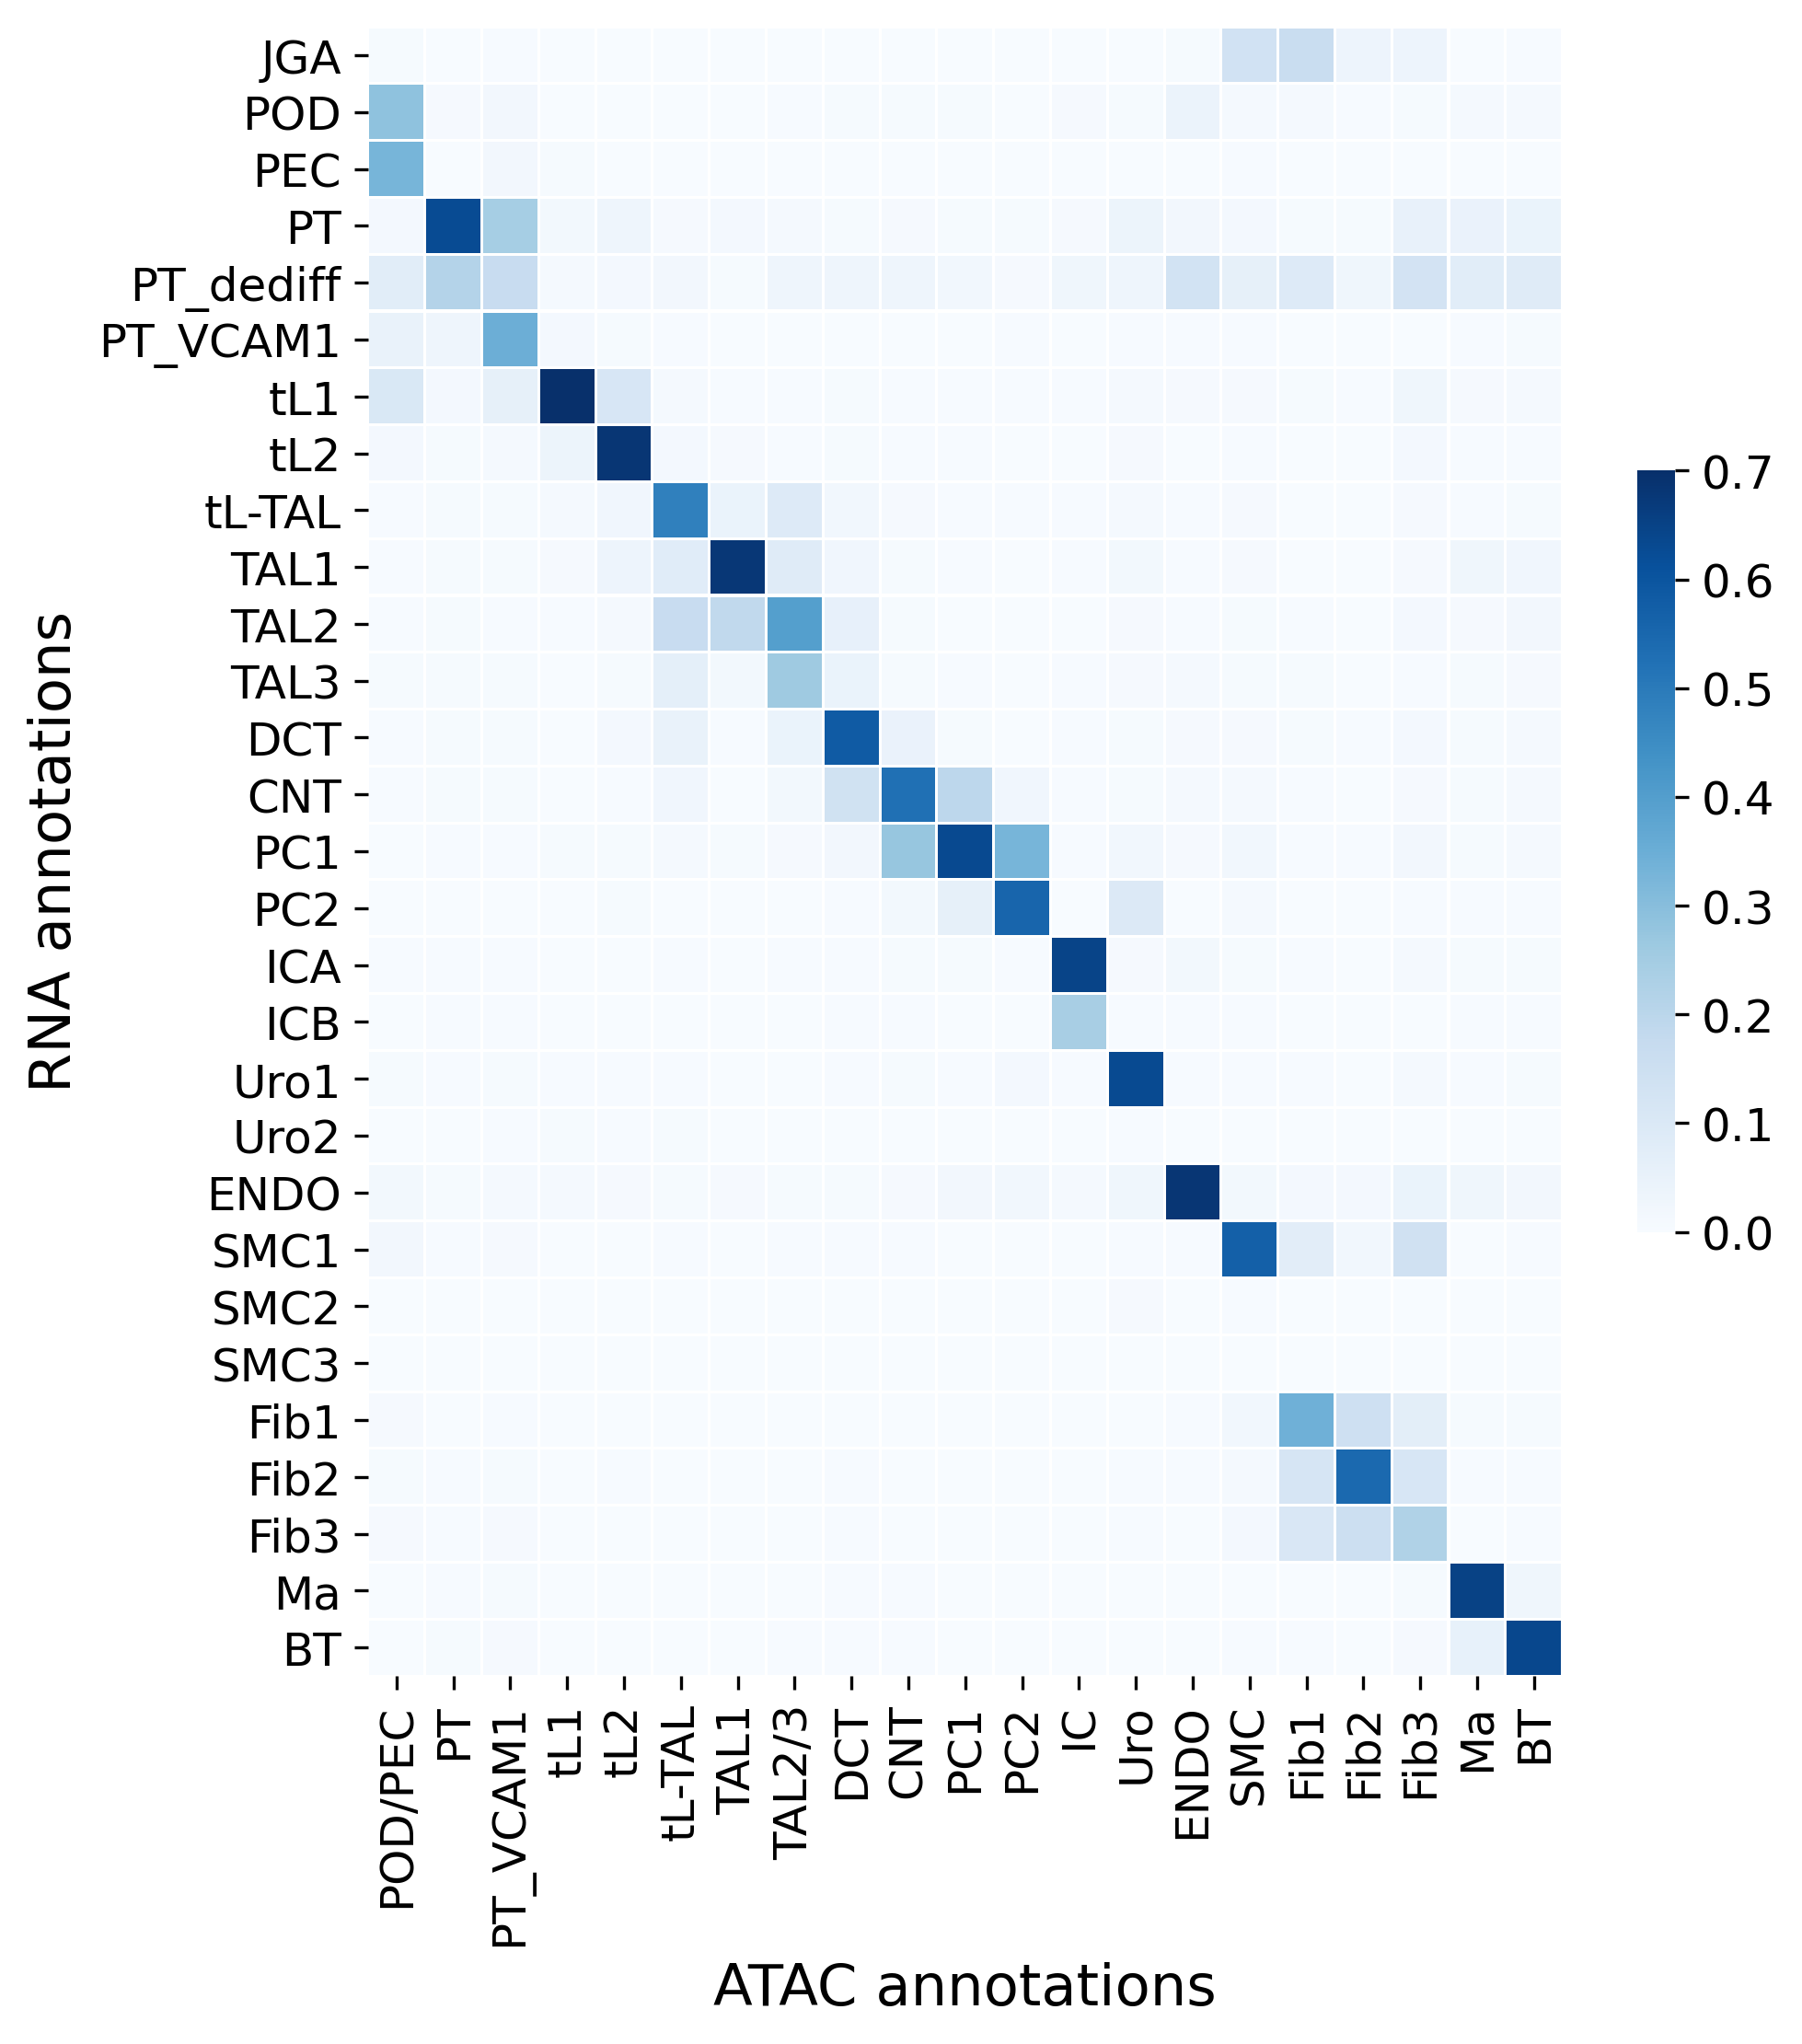

In [34]:
plt.figure(dpi=300,figsize=(7,10))
sns.heatmap(count_matrix2.T,cmap='Blues',square=True, linewidths=0.5, cbar_kws={"shrink": 0.3}, vmax=0.7
           )
plt.xlabel('ATAC annotations',fontsize=15)
plt.ylabel('RNA annotations',fontsize=15)
plt.tight_layout()
plt.show()